In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=6)

import warnings
warnings.simplefilter(action='ignore')

#https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [2]:
# Read CSV
file_name1 = 'stroke.csv'
stroke_df = pd.read_csv(file_name1)

# preview data
print(stroke_df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [3]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


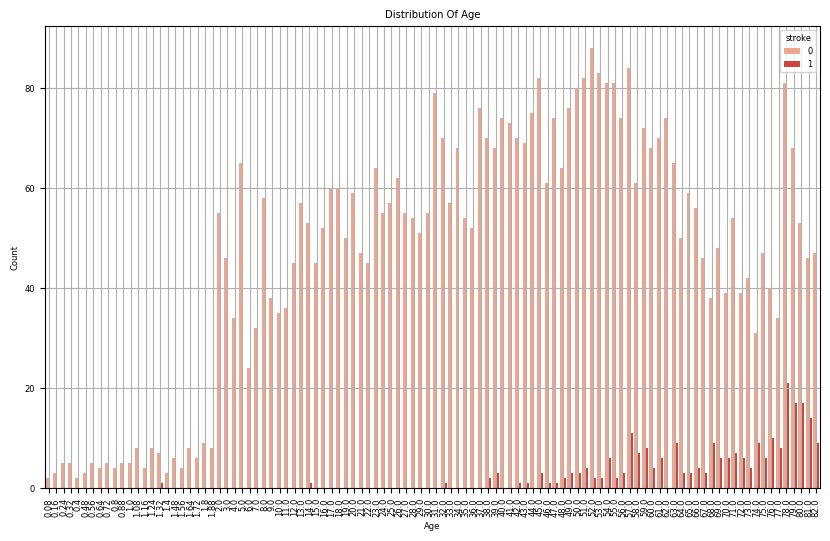

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.title("Distribution Of Age")
plt.grid(True)
plt.show()


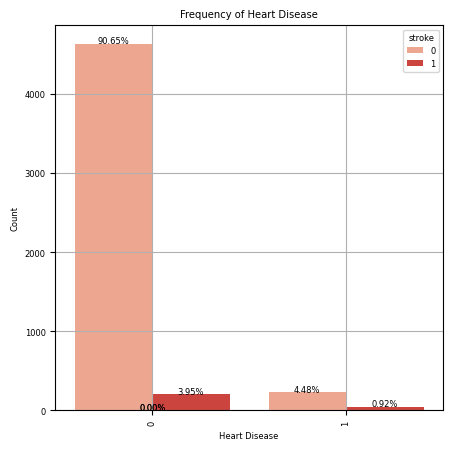

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming stroke_df is your DataFrame containing the data
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='heart_disease', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels 90 degrees
plt.title("Frequency of Heart Disease")
plt.grid(True)

# Calculate percentages and annotate the plot
total = len(stroke_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.show()


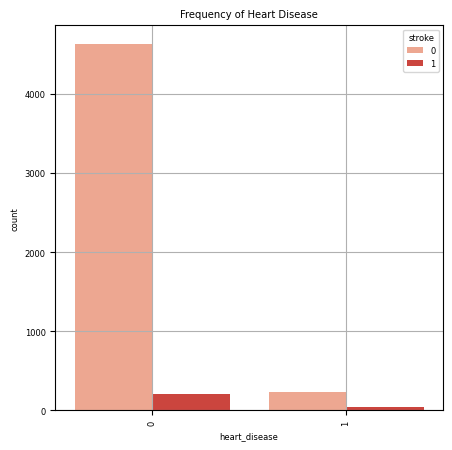

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x='heart_disease', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('heart_disease')
plt.ylabel('count')
plt.xticks(rotation=90)  # Rotate x-axis labels 90 degrees

plt.title("Frequency of Heart Disease")
plt.grid(True)
plt.show()


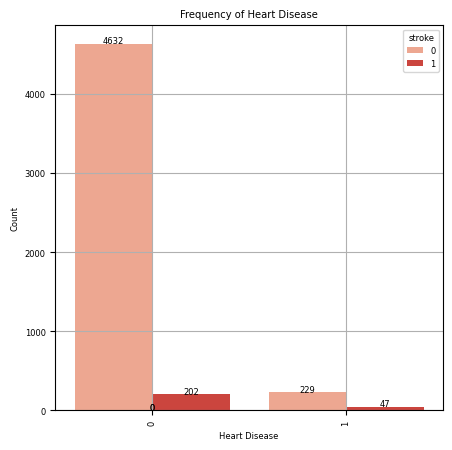

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
ax = sns.countplot(x='heart_disease', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.title("Frequency of Heart Disease")
plt.grid(True)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            int(height),
            ha="center")

plt.show()


In [8]:
#Checking for missing values
print(stroke_df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

feature_columns = ['age']  # List of feature columns
target_column = ['stroke']   # Target column

X = stroke_df[feature_columns]
y = stroke_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


In [24]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [25]:
correlation = stroke_df['age'].corr(stroke_df['stroke'])
correlation

0.24525734617097478

In [26]:
correlation1 = stroke_df['hypertension'].corr(stroke_df['stroke'])
correlation1

0.1279038234664804

In [27]:
correlation2 = stroke_df['bmi'].corr(stroke_df['stroke'])
correlation2

0.04237366114923354

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(stroke_df.corr(),annot=True)

ValueError: could not convert string to float: 'Male'

<Figure size 1000x600 with 0 Axes>

In [29]:
print("Correlation between variables:")
print(correlation)

Correlation between variables:
0.24525734617097478


In [30]:
#Further testing our model 
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())

Random Forest Cross-Validation Scores: [0.95476773 0.95354523 0.95354523 0.95471236 0.95471236]
Mean Accuracy: 0.9542565830622498


In [31]:
feature_importance_rf = rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({"Feature": feature_columns, "Importance": feature_importance_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by="Importance", ascending=False)
print("Random Forest Feature Importance:")
print(feature_importance_df_rf)

Random Forest Feature Importance:
  Feature  Importance
0     age         1.0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Assuming stroke_df contains your dataset

# Drop rows with missing values
stroke_df.dropna(inplace=True)

# Separate features and target variable
X = stroke_df.drop(columns=["id", "stroke"])
y = stroke_df["stroke"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ["age", "avg_glucose_level", "bmi"]
categorical_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the classifier pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', MLPClassifier(hidden_layer_sizes=(100, 100),
                                                   activation='relu',  
                                                   solver='adam',
                                                   max_iter=50,
                                                   random_state=42))])

# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.945010183299389


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Generate sample data (replace this with your actual data)
np.random.seed(0)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(2, size=1000)  # Binary labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


ModuleNotFoundError: No module named 'keras'